# Project: Investigate a Dataset No Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### No-show appointments:
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.

We will go through the data using the data wrangling steps trying to find answers for the following questions

    1. what is the difference between the show and no-show?
    2. Patient's neighbourhood could be a reason to absence?
    3. Dose the Scholarship has a role in patient absence?
    4. Dose the Hipertension has a role in patient absence?
    5. Dose the Diabetes has a role in patient absence?
    6. Dose the Alcoholism has a role in patient absence?
    7. Dose the Handicap has a role in patient absence?
    8. Dose the Gender has a role in patient absence?
    9. Dose increasing the waiting days has a role in patient absence?
    10. Dose the Appointment_day has a role in patient absence?
    11. what is making the patient missing his appointment? (Conclusions)

In [194]:
# importing all required library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

<a id='wrangling'></a>
## Data Wrangling

### 1. Data Gathering
    the data file CSV is downloaded from kaggle.com from this link 
    ( https://www.kaggle.com/joniarroba/noshowappointments/code ) 

In [195]:
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

## 2. Assessing Data
    1. Replace PatientId with PatientID & replace Handcap with Handicap
    2. ScheduledDay and AppointmentDay columns type need to be changed to date time
    3. in Age column we have two values need to be adjusted (-1 & 0)
        after opservation we found that
            1. -1 repeted once so we can drop it
            2. 0 repeted many times so we can replace this value by the mean 
            
    4. create column for Appointment_month and column for Appointment_day
    5. create column for waiting days.

In [196]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [197]:
df.info()
# replace PatientId with PatientID
# convert ScheduledDay and AppointmentDay to day time
# replace Handcap with Handicap
# create column for appointment_month and column for appointment_day

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [198]:
df.describe()
# there is something weird in age column

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [199]:
df[df["Age"]==-1]['Age'].count()
# -1 in age repeted once so we can drop it

1

In [200]:
df[df["Age"]==0]['Age'].count()
# so we can convert 0 with the mean

3539

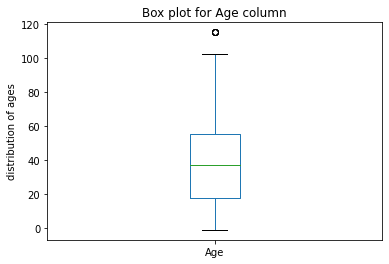

In [205]:
df['Age'].plot(kind='box',ylabel="distribution of ages",title="Box plot for Age column");
#we have an outlier near 120

In [206]:
age=df['Age'].unique()
np.sort(age)
# we have here one outlier after 102

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 102, 115],
      dtype=int64)

In [207]:
sum(df.duplicated())
#there is no duplication in the data

0

In [208]:
#checking the unique values of Scholarship column
df['Scholarship'].unique() 

array([0, 1], dtype=int64)

In [209]:
#checking the unique values of Hipertension column
df['Hipertension'].unique()

array([1, 0], dtype=int64)

In [210]:
#checking the unique values of Diabetes column
df['Diabetes'].unique()

array([0, 1], dtype=int64)

In [211]:
#checking the unique values of Alcoholism column
df['Alcoholism'].unique()

array([0, 1], dtype=int64)

In [212]:
#checking the unique values of Handcap column
df['Handcap'].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [213]:
#checking the unique values of SMS_received column
df['SMS_received'].unique()

array([0, 1], dtype=int64)

In [214]:
#checking the unique values of No-show column
df['No-show'].unique()

array(['No', 'Yes'], dtype=object)

## 3. Cleaning Data
    1. Adjusted columns name
    2. Converting the ScheduledDay and AppointmentDay columns type to date time
    3. Dealing with Age column
    4. Creating two columns one for Appointment_month and one for Appointment_day
    5. Creating column for Waiting days
    6. Dealing with waiting days column values

In [215]:
#first thing we will take a copy of the data
df_cleaning=df.copy()

### 1. Adjusted columns name
#### 1.a. Assessing

In [216]:
df_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### 1.b. Code

In [217]:
# adjusting columns names
df_cleaning=df_cleaning.rename(columns={"PatientId":"PatientID","Handcap":"Handicap"})

#### 1.C. Test

In [218]:
df_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientID       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handicap        110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### 2.Converting the ScheduledDay and AppointmentDay columns type to date time
#### 2.a. Assessing

In [219]:
df_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientID       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handicap        110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### 2.b. Code

In [220]:
# converting the ScheduledDay and AppointmentDay columns type to date time
df_cleaning["ScheduledDay"]=pd.to_datetime(df_cleaning["ScheduledDay"])
df_cleaning["AppointmentDay"]=pd.to_datetime(df_cleaning["AppointmentDay"])

#### 2.c.Test

In [221]:
df_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientID       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handicap        110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

#### 3. Dealing with Age column
#### 3.a. Assessing

In [222]:
age=df['Age'].unique()
np.sort(age)

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 102, 115],
      dtype=int64)

#### 3.b. Code

In [223]:
# Converting Zero by mean
df_cleaning['Age'] = df_cleaning['Age'].replace((0), df_cleaning['Age'].mean()) 
# Drop age < 0
df_cleaning=df_cleaning[df_cleaning["Age"]>0]

#### 3.c. Test

In [224]:
df_cleaning.describe()

,PatientID,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,38.276790,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,22.104661,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.088874,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### 4. Creating two columns one for Appointment_month and one for Appointment_day
#### 4.a. Assessing

In [225]:
df_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientID       110526 non-null  float64            
 1   AppointmentID   110526 non-null  int64              
 2   Gender          110526 non-null  object             
 3   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 5   Age             110526 non-null  float64            
 6   Neighbourhood   110526 non-null  object             
 7   Scholarship     110526 non-null  int64              
 8   Hipertension    110526 non-null  int64              
 9   Diabetes        110526 non-null  int64              
 10  Alcoholism      110526 non-null  int64              
 11  Handicap        110526 non-null  int64              
 12  SMS_received    110526 non-null  int64              
 13  No-show       

#### 4.b. Code

In [226]:
# Creating two columns one for Appointment_month and one for Appointment_day
df_cleaning["Appointment_month"]=df_cleaning["AppointmentDay"].dt.month
df_cleaning["Appointment_day"]=df_cleaning["AppointmentDay"].dt.day_name()

#### 4.c. Test

In [227]:
df_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   PatientID          110526 non-null  float64            
 1   AppointmentID      110526 non-null  int64              
 2   Gender             110526 non-null  object             
 3   ScheduledDay       110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay     110526 non-null  datetime64[ns, UTC]
 5   Age                110526 non-null  float64            
 6   Neighbourhood      110526 non-null  object             
 7   Scholarship        110526 non-null  int64              
 8   Hipertension       110526 non-null  int64              
 9   Diabetes           110526 non-null  int64              
 10  Alcoholism         110526 non-null  int64              
 11  Handicap           110526 non-null  int64              
 12  SMS_received       110526 non-

### 5. Creating column for Waiting days
#### 5.a. Assessing

In [228]:
df_cleaning.describe()

,PatientID,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,Appointment_month
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,38.276790,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,5.210041
std,2.560943e+14,7.129544e+04,22.104661,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,0.473776
min,3.921784e+04,5.030230e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
25%,4.172536e+12,5.640285e+06,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
50%,3.173184e+13,5.680572e+06,37.088874,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,6.000000


#### 5.b. Code

In [229]:
# Creating column for Waiting days
df_cleaning["WaitingDays"]=(df_cleaning["AppointmentDay"]-df_cleaning["ScheduledDay"]).dt.days

#### 5.c. Test

In [230]:
df_cleaning.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Appointment_month,Appointment_day,WaitingDays
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62.0,JARDIM DA PENHA,0,1,0,0,0,0,No,4,Friday,-1
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0,0,0,0,0,0,No,4,Friday,-1
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62.0,MATA DA PRAIA,0,0,0,0,0,0,No,4,Friday,-1
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8.0,PONTAL DE CAMBURI,0,0,0,0,0,0,No,4,Friday,-1
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56.0,JARDIM DA PENHA,0,1,1,0,0,0,No,4,Friday,-1


### 6. Dealing with waiting days column values
    after creating a new column for calculating the difference between the schedule day and the appointment day we found some invaled values like (-7, -2, -1)

#### 6.a. Assessing

In [231]:
waiting=df_cleaning["WaitingDays"].unique()
np.sort(waiting)
# there are a -ve waithing days we need to deal with

array([ -7,  -2,  -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
        10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,
        23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,
        36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,
        49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,
        62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,
        75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,
        88,  89,  90,  91,  92,  93,  94,  95,  96,  97, 100, 101, 102,
       103, 104, 106, 107, 108, 109, 110, 111, 114, 116, 118, 121, 122,
       124, 125, 126, 131, 132, 138, 141, 145, 150, 154, 161, 168, 175,
       178], dtype=int64)

#### 6.b. Code

In [232]:
#drop all waiting days less than zero
df_cleaning=df_cleaning[df_cleaning["WaitingDays"]>=0]

#### 6.c. Test

In [233]:
waiting=df_cleaning["WaitingDays"].unique()
np.sort(waiting)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97, 100, 101, 102, 103, 104, 106,
       107, 108, 109, 110, 111, 114, 116, 118, 121, 122, 124, 125, 126,
       131, 132, 138, 141, 145, 150, 154, 161, 168, 175, 178], dtype=int64)

## The dataset after cleaning phase

In [234]:
df_cleaning.head()

,PatientID,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Appointment_month,Appointment_day,WaitingDays
5,9.598513e+13,5626772,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76.0,REPÚBLICA,0,1,0,0,0,0,No,4,Friday,1
6,7.336882e+14,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23.0,GOIABEIRAS,0,0,0,0,0,0,Yes,4,Friday,1
7,3.449833e+12,5630575,F,2016-04-27 15:39:58+00:00,2016-04-29 00:00:00+00:00,39.0,GOIABEIRAS,0,0,0,0,0,0,Yes,4,Friday,1
9,7.812456e+13,5629123,F,2016-04-27 12:48:25+00:00,2016-04-29 00:00:00+00:00,19.0,CONQUISTA,0,0,0,0,0,0,No,4,Friday,1
10,7.345362e+14,5630213,F,2016-04-27 14:58:11+00:00,2016-04-29 00:00:00+00:00,30.0,NOVA PALESTINA,0,0,0,0,0,0,No,4,Friday,1


<a id='eda'></a>
## Exploratory Data Analysis

#### We will start the visualization phase to answer the following questions
    1. what is the difference between the show and no-show?
    2. Patient's neighbourhood could be a reason to absence?
    3. Dose the Scholarship has a role in patient absence?
    4. Dose the Hipertension has a role in patient absence?
    5. Dose the Diabetes has a role in patient absence?
    6. Dose the Alcoholism has a role in patient absence?
    7. Dose the Handicap has a role in patient absence?
    8. Dose the Gender has a role in patient absence?
    9. Dose increasing the waiting days has a role in patient absence?
    10. Dose the Appointment_day has a role in patient absence?
   

In [235]:
# take a copy of the cleaned data
df_forv=df_cleaning.copy()

### Research Question 1 (what is the difference between the show and no-show?)

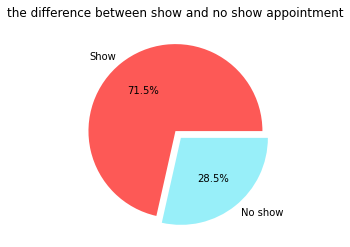

In [236]:
explode=(0,0.1);
plt.pie(df_forv["No-show"].value_counts(),explode=explode, labels = ["Show", "No show"], colors = ['xkcd:grapefruit','xkcd:robin\'s egg blue'], autopct='%.1f%%');
plt.title("the difference between show and no show appointment");


from the graph we can observe that 28.5% of the population will miss the appointment

### Research Question 2  ( Patient's neighbourhood could be a reason to absence? )

In [237]:
#creating a series with the high Neighbourhood demand
high_place=df_forv['Neighbourhood'].value_counts()
high_place

JARDIM CAMBURI                 5213
MARIA ORTIZ                    3730
RESISTÊNCIA                    2818
JARDIM DA PENHA                2655
ITARARÉ                        2381
                               ... 
PONTAL DE CAMBURI                41
ILHA DO BOI                      23
ILHA DO FRADE                     8
AEROPORTO                         5
ILHAS OCEÂNICAS DE TRINDADE       2
Name: Neighbourhood, Length: 80, dtype: int64

In [238]:
# creating a data frame containg No-show values only
noshowcount=df_forv[df_forv['No-show']=="Yes"]

#creat a data series contain neighbourhood with filter on no-show values only
high_placenoshow=noshowcount['Neighbourhood'].value_counts()
high_placenoshow

JARDIM CAMBURI                 1359
MARIA ORTIZ                    1138
ITARARÉ                         869
RESISTÊNCIA                     857
JESUS DE NAZARETH               658
                               ... 
PONTAL DE CAMBURI                12
ILHA DO FRADE                     2
ILHAS OCEÂNICAS DE TRINDADE       2
ILHA DO BOI                       2
AEROPORTO                         1
Name: Neighbourhood, Length: 80, dtype: int64

In [239]:
# creating a loop to caculate the percentage of No-show from the total number of the appointment in each place
place_list=np.array([])
i=0
while i<=high_placenoshow.size-1:
    noshowgraph=((high_placenoshow.iloc[i])/(high_place.iloc[i])*100).round(decimals=2)
    place_list=np.append(place_list,noshowgraph)
    i=i+1
print(place_list)

[26.07 30.51 30.84 32.28 27.64 28.77 31.03 30.83 30.8  30.34 29.19 29.67
 29.24 28.69 28.47 28.67 28.61 29.82 30.01 29.48 28.18 28.85 26.95 27.08
 29.01 29.02 27.69 29.66 29.84 30.18 29.3  29.71 28.05 27.72 27.72 24.46
 27.02 28.36 27.5  26.1  26.24 27.09 24.07 23.82 24.37 25.52 26.88 26.48
 26.01 26.41 30.71 27.9  26.63 26.07 25.29 24.63 26.14 26.51 27.02 23.24
 23.72 24.05 24.77 24.89 24.87 26.11 26.86 26.01 26.38 32.54 30.7  27.68
 26.85 25.24 20.51 29.27  8.7  25.   40.   50.  ]


In [240]:
# creating an array contain the names of the hospitals
data_index=high_placenoshow.index
data_index

Index(['JARDIM CAMBURI', 'MARIA ORTIZ', 'ITARARÉ', 'RESISTÊNCIA',
       'JESUS DE NAZARETH', 'CENTRO', 'JARDIM DA PENHA', 'CARATOÍRA',
       'TABUAZEIRO', 'BONFIM', 'ANDORINHAS', 'ILHA DO PRÍNCIPE', 'SANTO ANDRÉ',
       'SANTA MARTHA', 'SÃO PEDRO', 'ROMÃO', 'JABOUR', 'GURIGICA',
       'SANTO ANTÔNIO', 'MARUÍPE', 'DA PENHA', 'SÃO JOSÉ', 'SÃO CRISTÓVÃO',
       'ILHA DE SANTA MARIA', 'NOVA PALESTINA', 'BELA VISTA', 'SANTOS DUMONT',
       'FORTE SÃO JOÃO', 'CRUZAMENTO', 'PRAIA DO SUÁ', 'REDENÇÃO',
       'SÃO BENEDITO', 'JOANA D´ARC', 'SANTA TEREZA', 'CONSOLAÇÃO',
       'GRANDE VITÓRIA', 'INHANGUETÁ', 'ILHA DAS CAIEIRAS', 'BENTO FERREIRA',
       'PRAIA DO CANTO', 'PARQUE MOSCOSO', 'MONTE BELO', 'FONTE GRANDE',
       'CONQUISTA', 'VILA RUBIM', 'REPÚBLICA', 'SANTA CLARA', 'JUCUTUQUARA',
       'DO QUADRO', 'GOIABEIRAS', 'SANTA CECÍLIA', 'MATA DA PRAIA',
       'SANTOS REIS', 'ESTRELINHA', 'DO MOSCOSO', 'PIEDADE', 'DO CABRAL',
       'BARRO VERMELHO', 'SANTA LÚCIA', 'SANTA LUÍZA', 'S

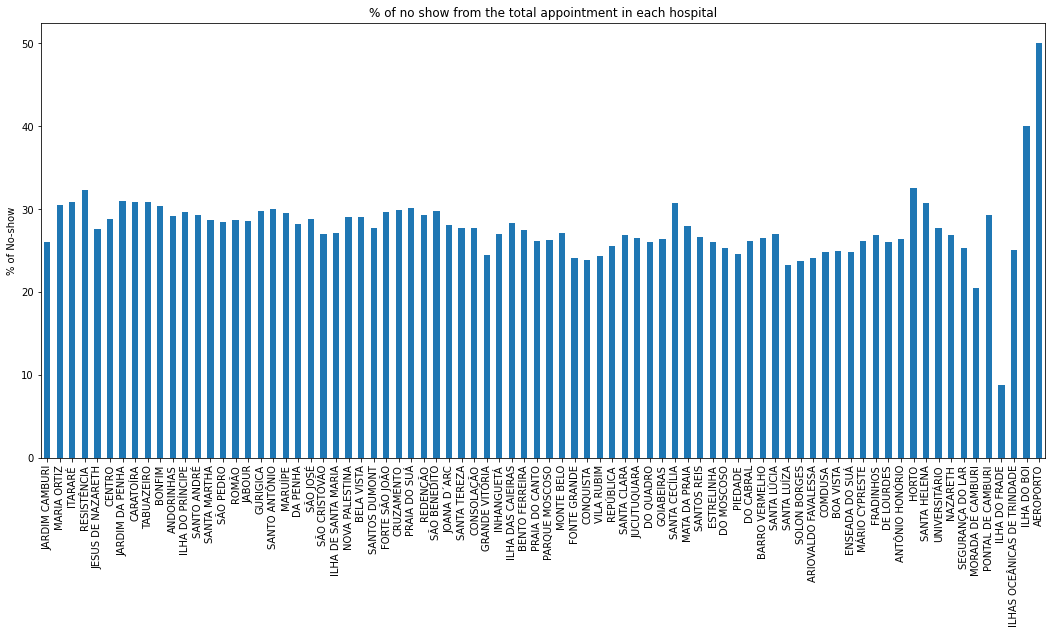

In [241]:
no_show_in_places=pd.DataFrame(index=data_index,data=place_list)
no_show_in_places.plot(kind="bar",figsize=(18,8),legend=None,title="% of no show from the total appointment in each hospital",ylabel=('% of No-show'));

from this graph we can observe that (AEROPORTO) has aroud 50% no-show, maybe this high value depend on the quality of the hospital so we need more information to investigate this issue

#### creating a function contains the graph code 

In [242]:
def countgraph(datainy,dataname):
    ax=sns.countplot(x=datainy,hue=df_forv["No-show"],data=df_forv);
    ax.set_title("Relation between {} and No-show".format(dataname),fontsize=15);

### Research Question 3 (Dose the Scholarship has a role in patient absence?)

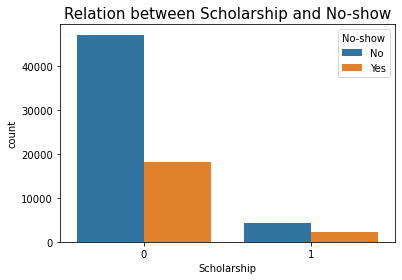

In [243]:
countgraph(df_forv["Scholarship"],"Scholarship")

From the graph we can observe that "Scholarship" dose not play any role.

### Research Question 4 (Dose the Hipertension has a role in patient absence?)

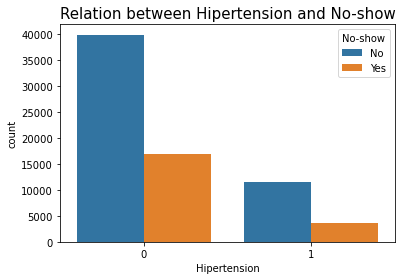

In [244]:
countgraph(df_forv["Hipertension"],"Hipertension")

From the graph we can observe that "Hipertension" dose not play any role.

### Research Question 5 (Dose the Diabetes has a role in patient absence?)

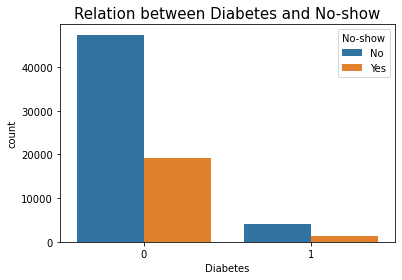

In [245]:
countgraph(df_forv["Diabetes"],"Diabetes")

From the graph we can observe that "Diabetes" dose not play any role.

### Research Question 6 (Dose the Alcoholism has a role in patient absence?)

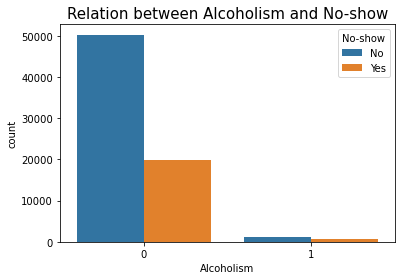

In [246]:
countgraph(df_forv["Alcoholism"],"Alcoholism")

From the graph we can observe that "Alcoholism" dose not play any role.

### Research Question 7 (Dose the Handicap has a role in patient absence?)

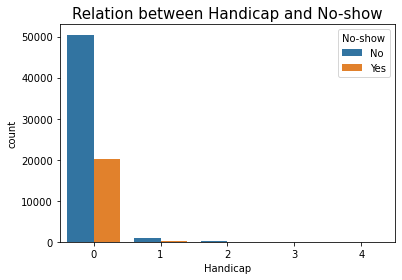

In [247]:
countgraph(df_forv["Handicap"],"Handicap")

From the graph we can observe that "Handicap" dose not play any role.

### Research Question 8 (Dose the Gender has a role in patient absence?)

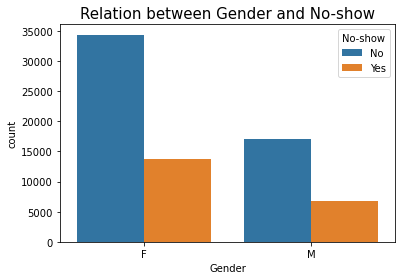

In [248]:
countgraph(df_forv["Gender"],"Gender")

From the graph we can observe that "Gender" dose not play any role.

### Research Question 9 (Dose increasing the waiting days has a role in patient absence?)

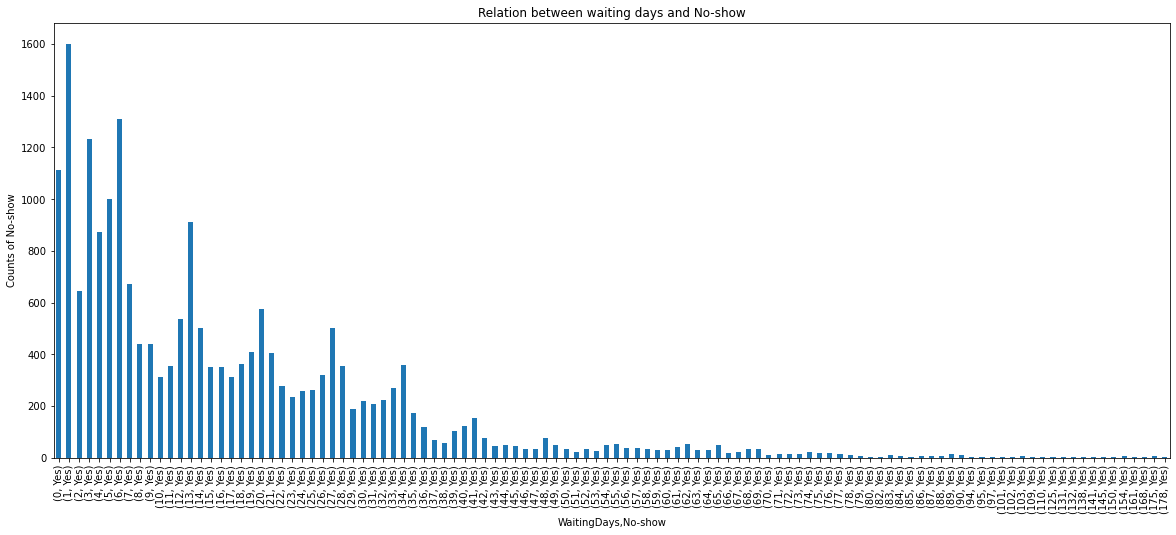

In [249]:
#creating a data frame contains No-show only
waiting=df_forv[df_forv["No-show"]=="Yes"]

#creating a plot shows the distribution of the waiting days and the No-show counts.
waiting.groupby(["WaitingDays"])["No-show"].value_counts().plot(kind="bar",figsize=(20,8),title="Relation between waiting days and No-show",ylabel=("Counts of No-show"),fontsize=10);

from this graph we can observe that ther is no relation between increasing the waiting days and No-show

### Research Question 10 (Dose the Appointment_day has a role in patient absence?)

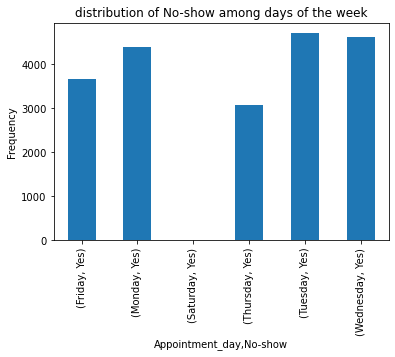

In [250]:
waiting.groupby(["Appointment_day"])["No-show"].value_counts().plot(kind="bar",ylabel=('Frequency'),title="distribution of No-show among days of the week");

in Tuesday we have highest number of no show appointment

<a id='conclusions'></a>
## Conclusions

After making the analysis of the dataset I found that there is no relation between the No-show and many factors in the data, and the No-show may be affected by the hospital place and the appointment day.
### Limitations

using the available dataset will not allow us to answer the most important question (what is making the patient missing his appointment?)

maybe we need to make a survey for patients who attended the appointment, asking them about their opinion in the hospital, doctor,... etc


In [251]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1